In [8]:
from sklearn.datasets import load_breast_cancer
import pandas as pd

In [9]:
X, y = load_breast_cancer(return_X_y=True)

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

**Hyperparameters for random forest**

_n_estimators:_ The number of trees in the forest.

_criterion:_ The function to measure the quality of a split. Supported criteria are "gini" for the Gini impurity and "entropy" for the information gain.

_max_depth:_ The maximum depth of the tree.

_min_samples_split:_ The minimum number of samples required to split an internal node.

_min_samples_leaf:_ The minimum number of samples required to be at a leaf node.

_max_features:_ The number of features to consider when looking for the best split.

_bootstrap:_ Whether bootstrap samples are used when building trees.

_oob_score:_ Whether to use out-of-bag samples to estimate the generalization accuracy.

_n_jobs:_ The number of jobs to run in parallel for both fit and predict.

_random_state:_ Controls both the randomness of the bootstrapping of the samples used when building trees and the sampling of the features to consider when looking for the best split.

_verbose:_ Controls the verbosity when fitting and predicting.

_warm_start:_ When set to True, reuse the solution of the previous call to fit and add more estimators to the ensemble, otherwise, just fit a whole new forest.

_class_weight:_ Weights associated with classes in the form "balanced", "balanced_subsample" or None. If not given, all classes are supposed to have weight one. For multi-output problems, a list of dicts can be provided in the same order as the columns of y


In [11]:
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

train_accuracy, test_accuracy

(1.0, 0.956140350877193)

In [12]:
from sklearn.metrics import confusion_matrix

train_cm = confusion_matrix(y_train, y_train_pred)
test_cm = confusion_matrix(y_test, y_test_pred)

train_cm, test_cm

(array([[169,   0],
        [  0, 286]], dtype=int64),
 array([[40,  3],
        [ 2, 69]], dtype=int64))

In [14]:
from sklearn.model_selection import GridSearchCV

rf = RandomForestClassifier()
list_max_depth = [3, 5, 7]
n_estimators = list(range(10, 200, 10))

param_grid = {"max_depth": list_max_depth, "n_estimators": n_estimators}

grid_search = GridSearchCV(rf, param_grid, cv=5)
grid_search.fit(X_train, y_train)

grid_search.best_params_

KeyboardInterrupt: 

In [ ]:
import matplotlib.pyplot as plt


rf = grid_search.best_estimator_



BreastData = pd.DataFrame(X, columns=load_breast_cancer().feature_names)

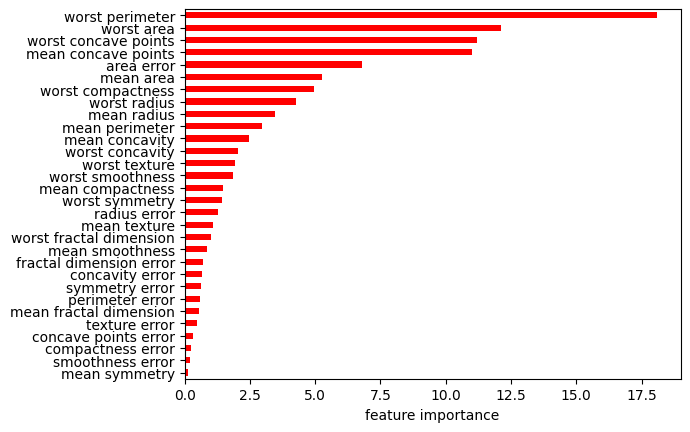

In [ ]:
Importance = pd.DataFrame(
    {"Importance": rf.feature_importances_ * 100},
    index=load_breast_cancer().feature_names,
)
Importance.sort_values(by="Importance", axis=0, ascending=True).plot(
    kind="barh", color="r"
)
plt.xlabel("feature importance")
plt.gca().legend_ = None

In [ ]:
def plot_feature_importance(params):
    fig, axs = plt.subplots(
        nrows=len(params) // 3 + len(params) % 3,
        ncols=3,
        figsize=(15, 5 * len(params) // 3),
    )
    axs = axs.flatten()  # to make it easier to iterate over
    for i, param in enumerate(params):
        model = RandomForestClassifier(n_estimators=param)
        model.fit(X_train, y_train)
        Importance = pd.DataFrame(
            {"Importance": model.feature_importances_ * 100},
            index=load_breast_cancer().feature_names,
        )
        Importance.sort_values(by="Importance", axis=0, ascending=True).plot(
            kind="barh", color="r", ax=axs[i]
        )
        axs[i].set_xlabel(f"feature importance for {param} trees")
        axs[i].legend_ = None
    plt.tight_layout()
    plt.show()

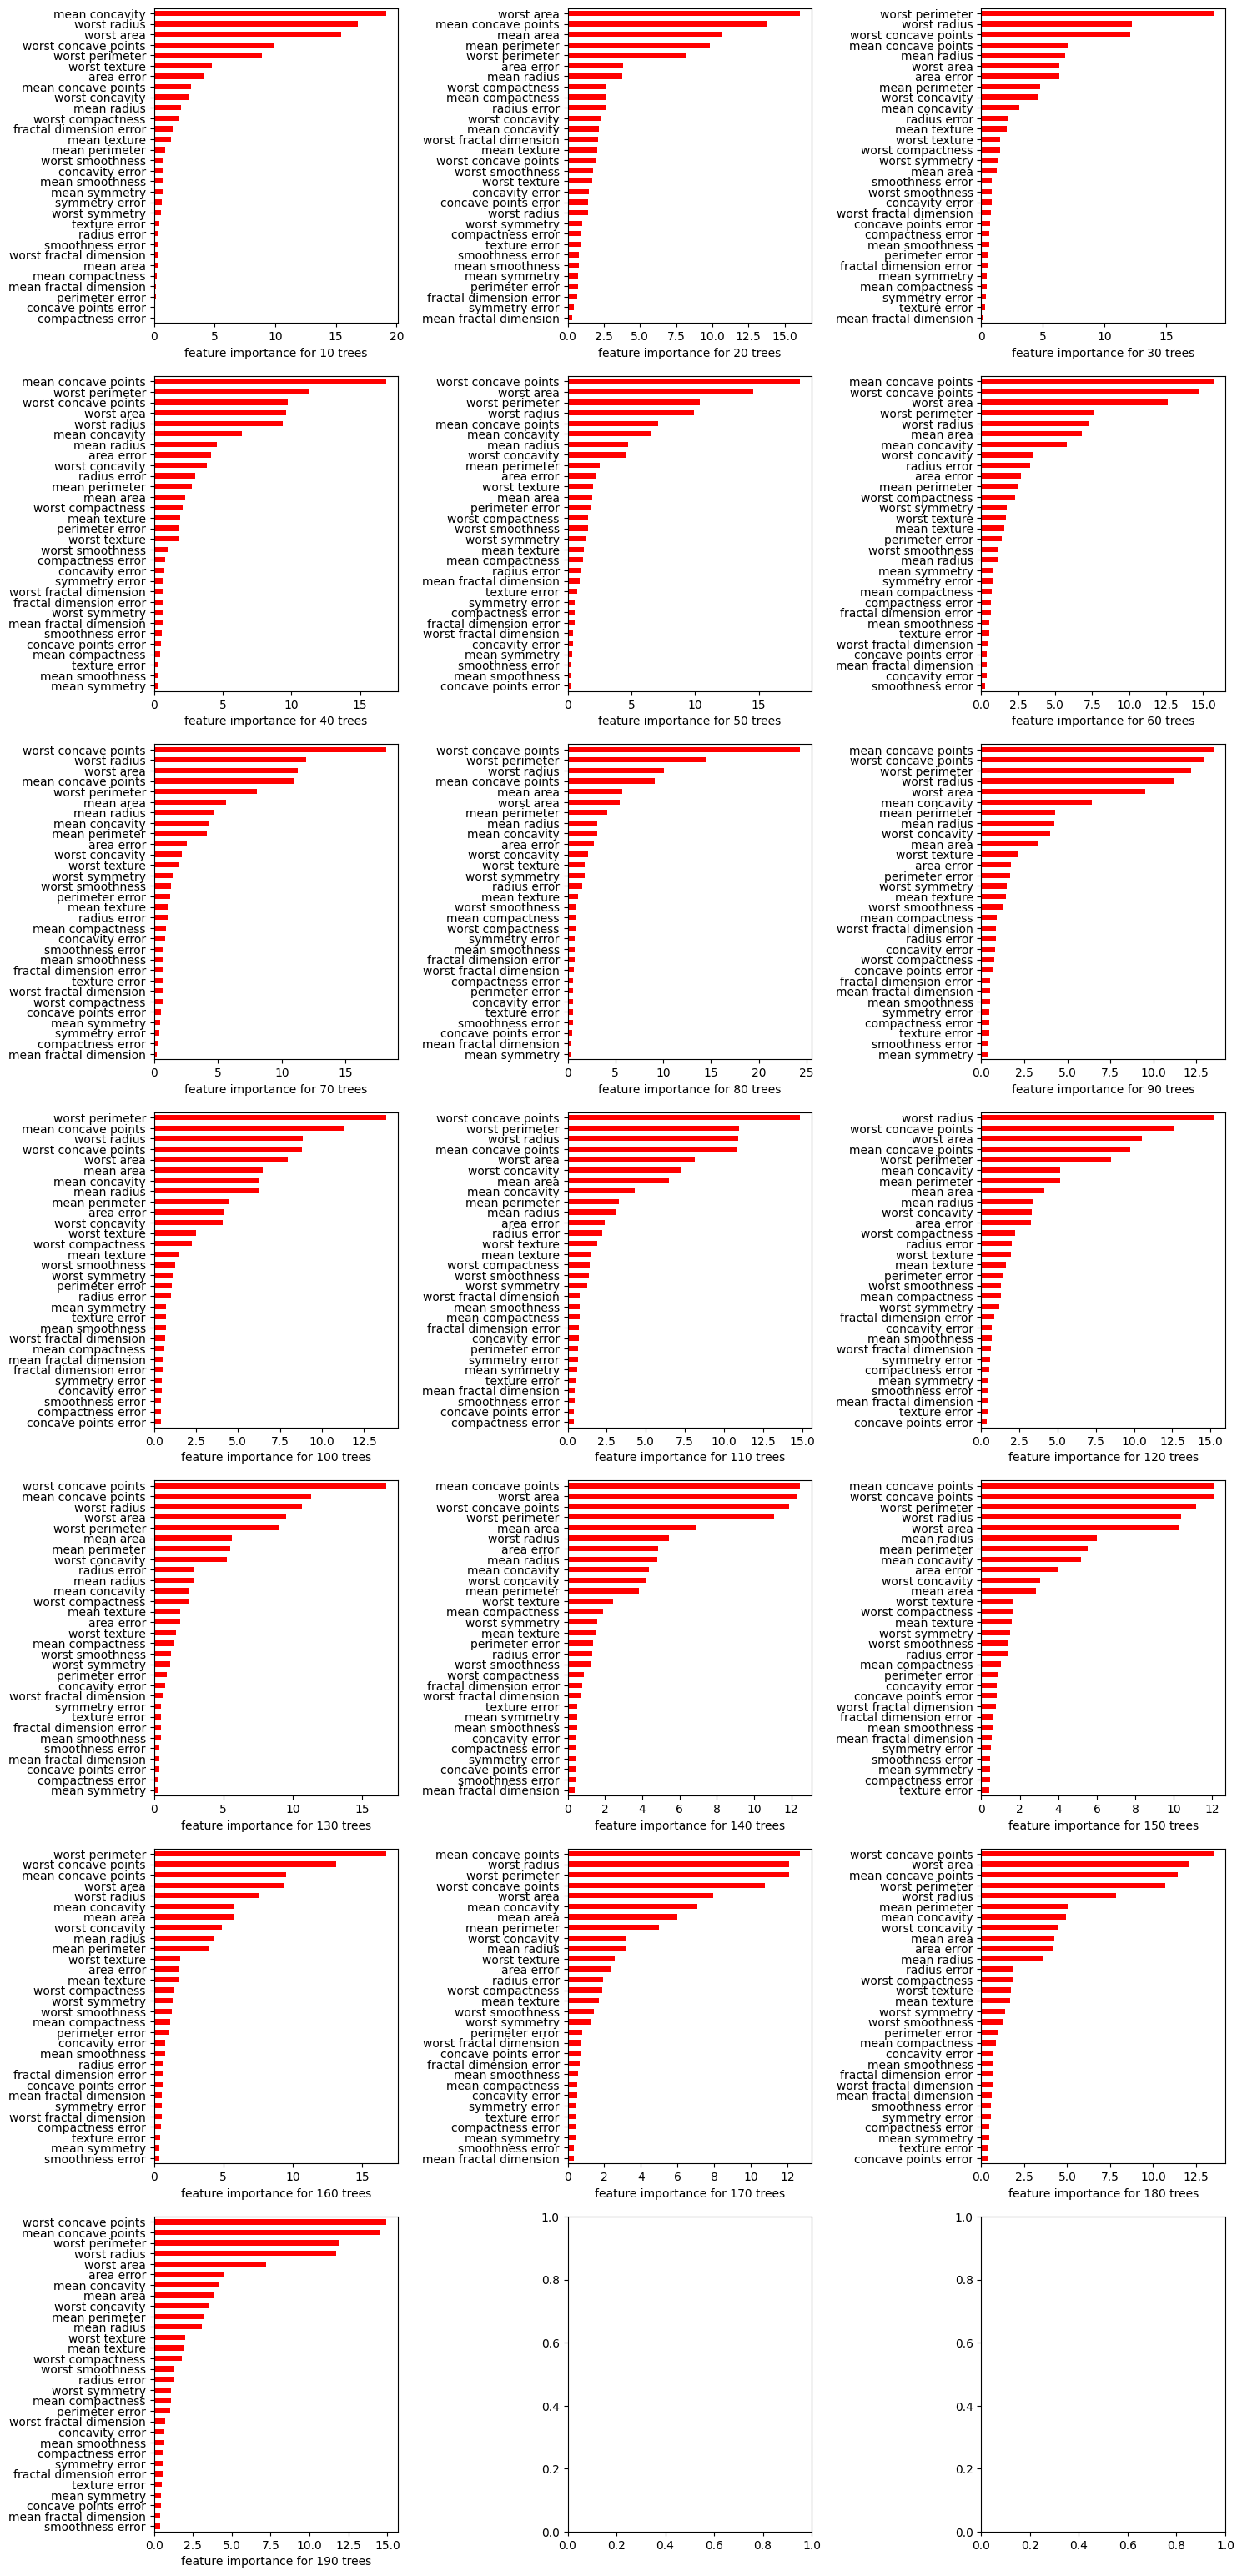

In [ ]:
plot_feature_importance(n_estimators)

Yes, the most important features change if you choose a different number of trees in a random forest.
